In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# check the columns values
categorical_col = df.select_dtypes(exclude='number').columns
numerical_col = df.select_dtypes(include='number').columns
# df.columns = df.columns.astype(str)

print(f'Number of Categorical columns = {len(categorical_col)}')

print('-'*60)

print(f'Number of Numerical columns = {len(numerical_col)}')

Number of Categorical columns = 16
------------------------------------------------------------
Number of Numerical columns = 10


In [ ]:
# check the values in the Categrical Columns from Data Frame
for valu in categorical_col:
  print(f'Column {valu} has {df[valu].unique()}')
  print('-'*60)

Column normalized-losses has ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
------------------------------------------------------------
Column make has ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
------------------------------------------------------------
Column fuel-type has ['gas' 'diesel']
------------------------------------------------------------
Column aspiration has ['std' 'turbo']
------------------------------------------------------------
Column num-of-doors has ['two' 'four' '?']
------------------------------------------------------------
Column body

In [ ]:

# Replace '?' with NaN (missing value representation)
df.replace('?', np.nan, inplace=True)


In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
float_cols = ['normalized-losses','bore','stroke','price']
df[float_cols] = df[float_cols].astype(float)

df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mode()[0], inplace=True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

int_cols = ['horsepower','peak-rpm']
df[int_cols] = df[int_cols].astype(int)

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
categorical_col = df.select_dtypes(exclude='number').columns
numerical_col = df.select_dtypes(include='number').columns

print(f'Number of Categorical columns = {len(categorical_col)}')

print('-'*60)

print(f'Number of Numerical columns = {len(numerical_col)}')

Number of Categorical columns = 10
------------------------------------------------------------
Number of Numerical columns = 16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,103.902439,5129.02439,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.680343,478.40526,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.00000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.00000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.00000,49.000000,54.000000,45400.000000


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

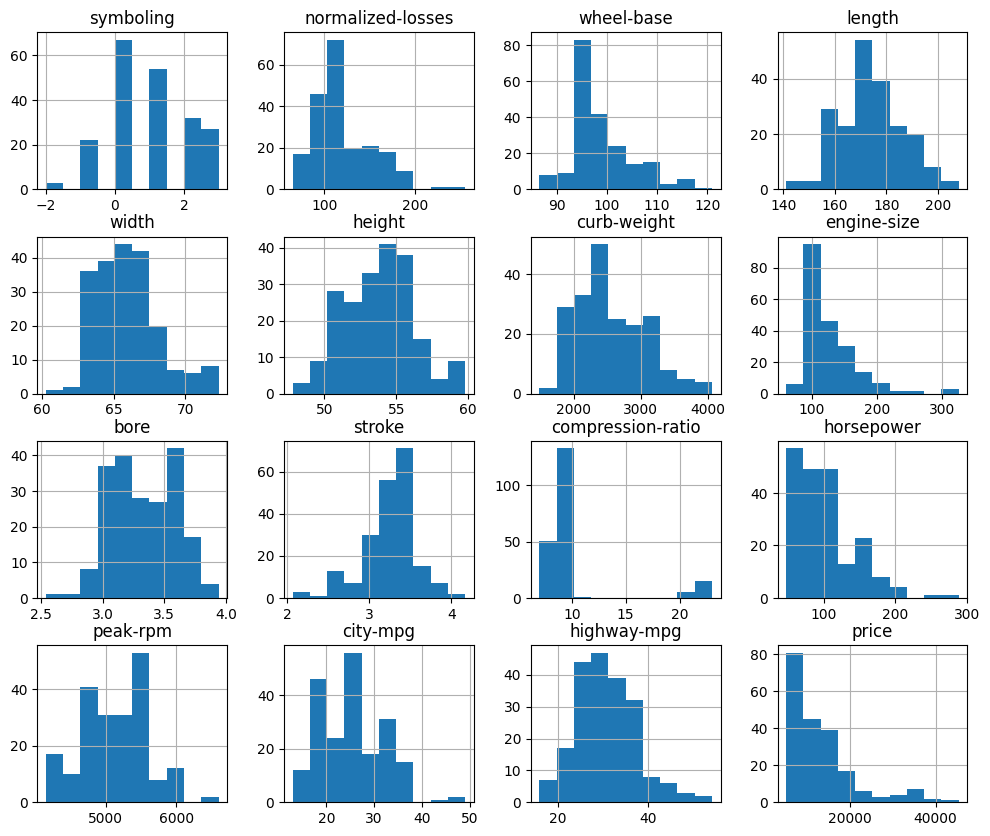

In [ ]:
df[numerical_col].hist(figsize=[12,10])

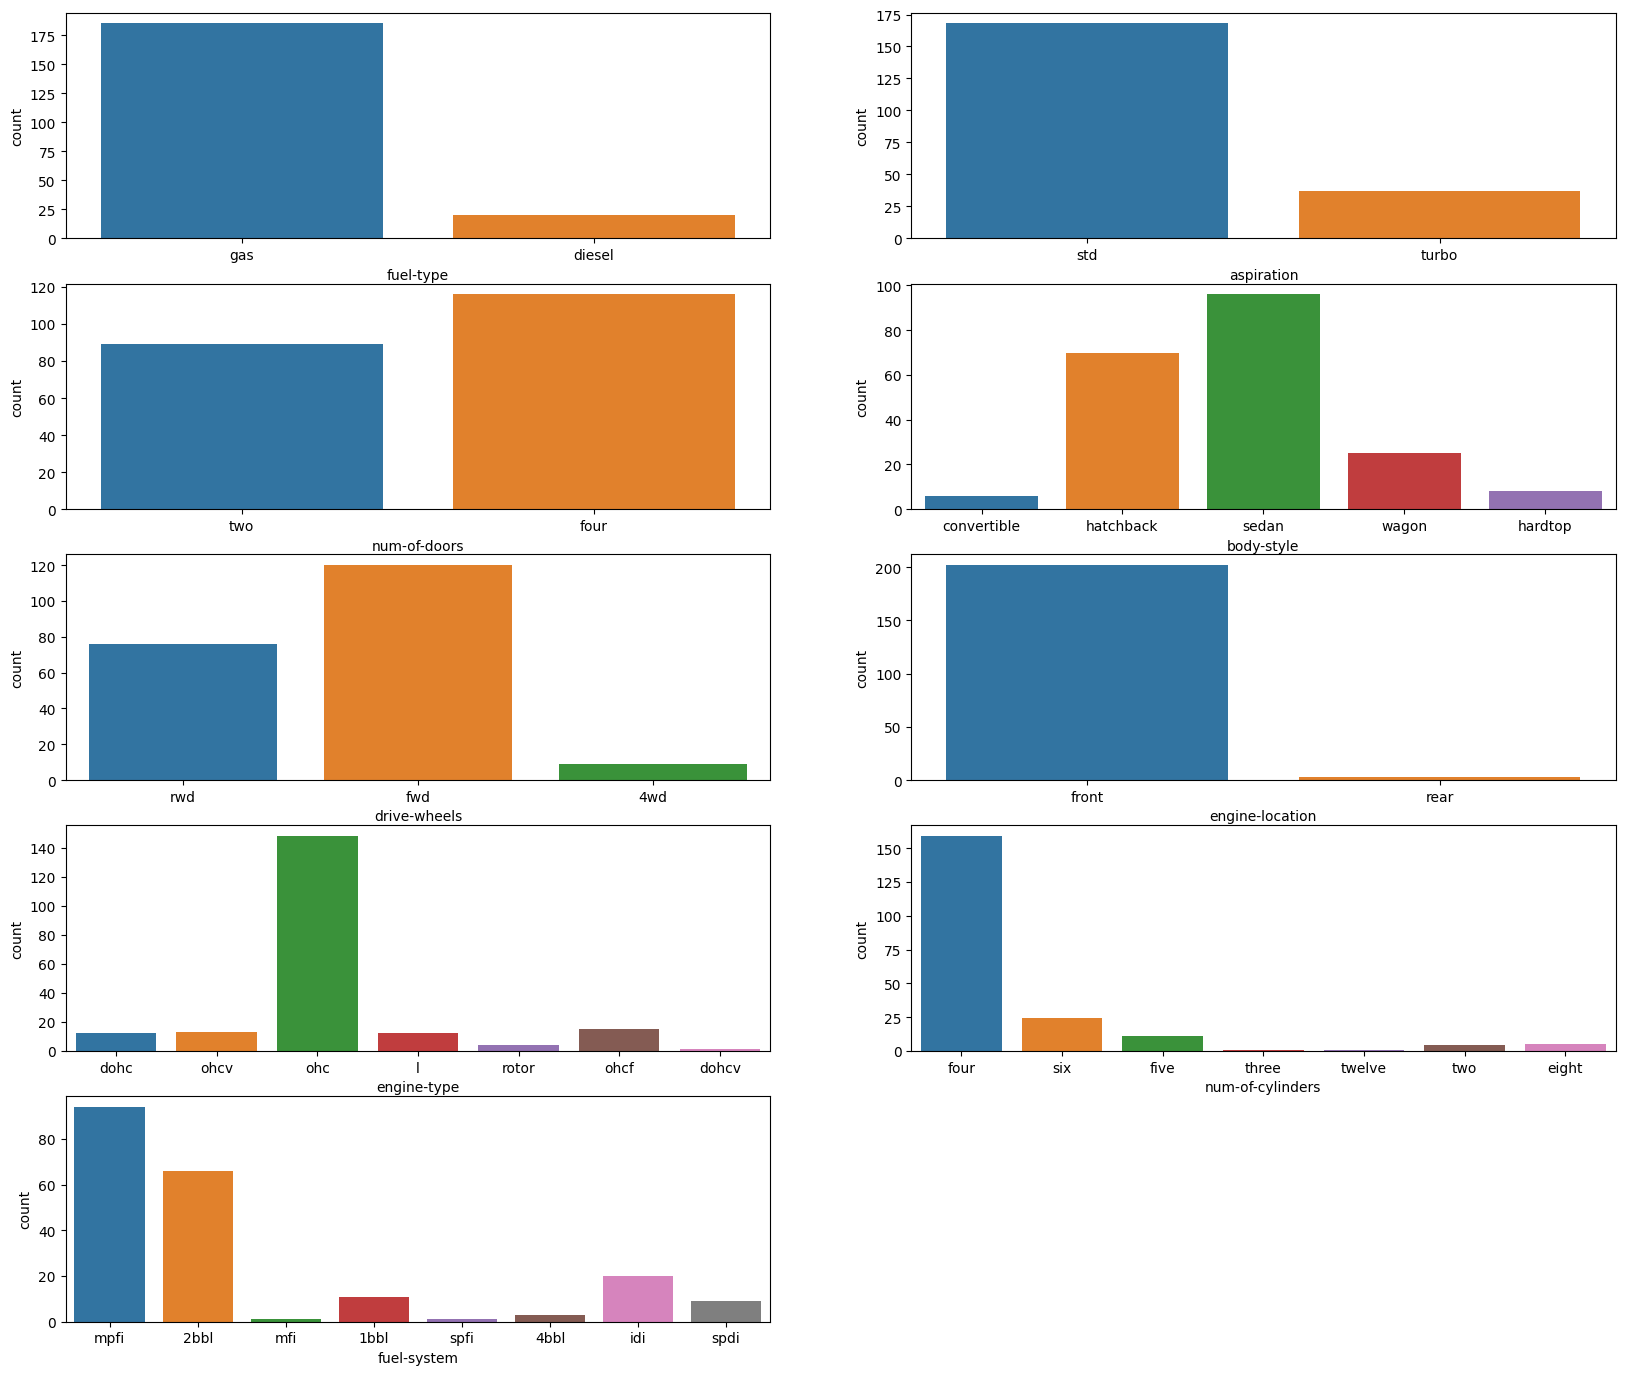

In [ ]:
plt.figure(figsize=(20,17))

for i in range(len(categorical_col)):
    if i != 9 :
      plt.subplot(5,2,i+1)
      sns.countplot(data=df , x=categorical_col[i+1])
    else:
      break

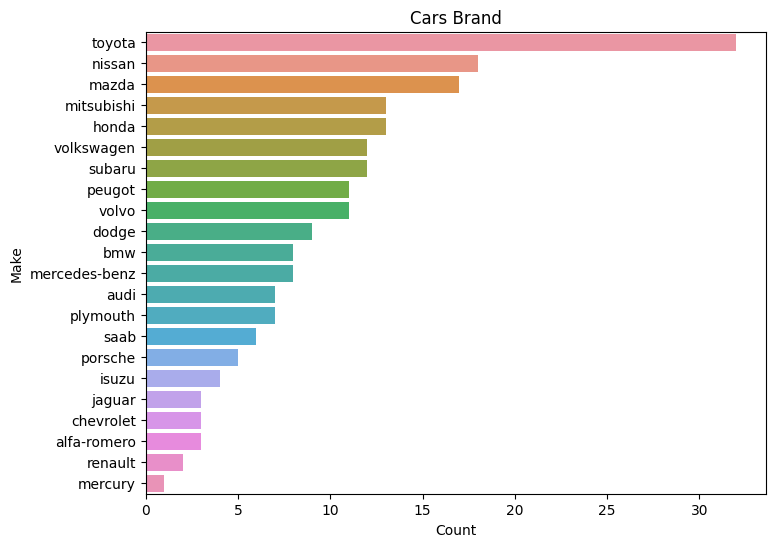

In [ ]:
plt.figure(figsize=(8,6))
# Sort the values based on count in descending order
sorted_make = df['make'].value_counts().sort_values(ascending=False).index

sns.countplot(data=df, y='make', order=sorted_make)

plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Cars Brand')

plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
numerical_col =numerical_col.tolist()

# element_to_remove = ['symboling','price']

# for element in element_to_remove:
numerical_col.remove('price')


numerical_col

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=False)

df_copy[numerical_col] = pt.fit_transform(df_copy[numerical_col])

array([[<Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bore'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peak-rpm'}>],
       [<Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>, <Axes: >, <Axes: >]],
      dtype=object)

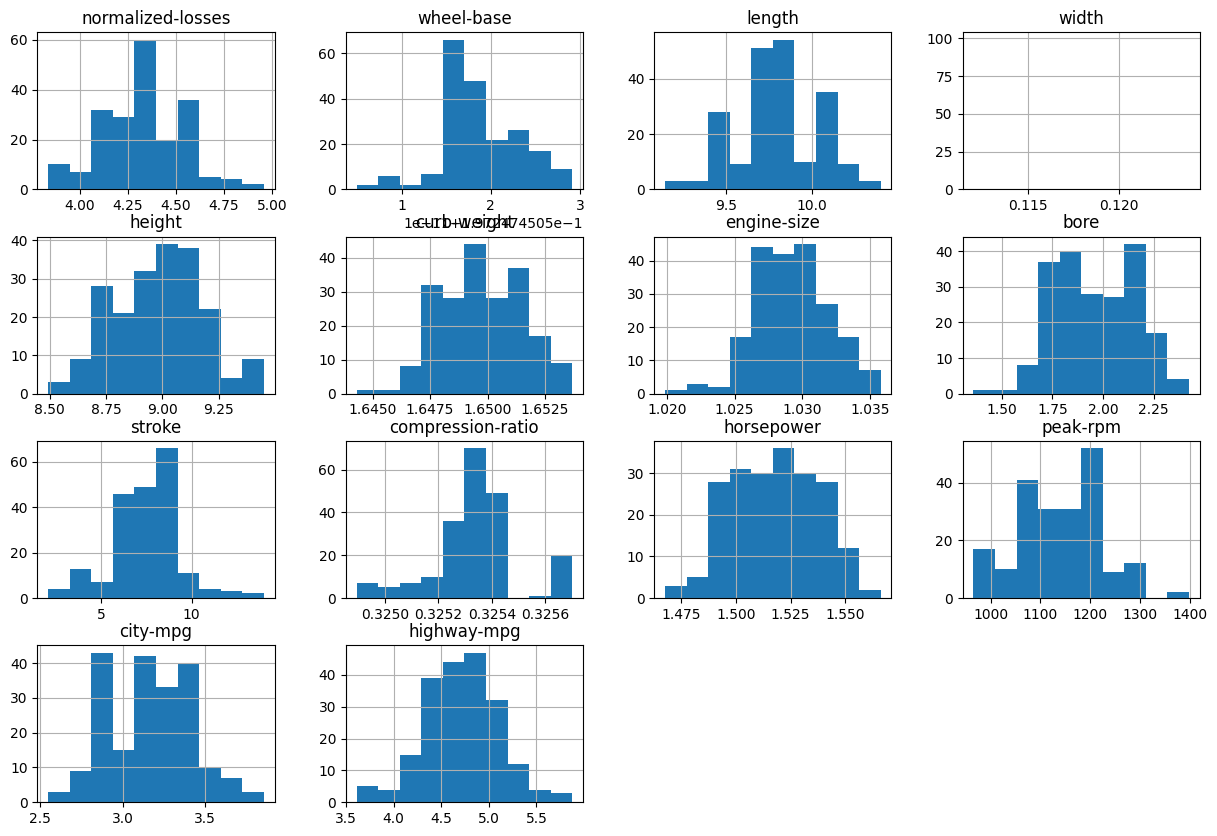

In [ ]:
df_copy[numerical_col].hist(figsize=[15,10])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Apply standard scaling to the numerical columns
df_copy[numerical_col] = scaler.fit_transform(df_copy[numerical_col])

In [ ]:
y = df_copy['price']
X = df_copy.drop(['price'], axis=1)
X.shape , y.shape

((205, 25), (205,))

In [ ]:
# Label encoding for categoricals
for colname in X[categorical_col]:
    X[colname], uniq_labels = X[colname].factorize()

X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.0,0.298429,0,0,0,0,0,0,0,0.058309,...,0,0.260377,0,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,1.0,0.298429,0,0,0,0,0,0,0,0.058309,...,0,0.260377,0,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.6,0.298429,0,0,0,0,1,0,0,0.230321,...,1,0.343396,0,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.8,0.518325,1,0,0,1,2,1,0,0.384840,...,0,0.181132,0,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.8,0.518325,1,0,0,1,2,2,0,0.373178,...,2,0.283019,0,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.157068,21,0,0,1,2,0,0,0.655977,...,0,0.301887,0,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.2,0.157068,21,0,1,1,2,0,0,0.655977,...,0,0.301887,0,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.2,0.157068,21,0,0,1,2,0,0,0.655977,...,1,0.422642,0,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.2,0.157068,21,1,1,1,2,0,0,0.655977,...,1,0.316981,6,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [ ]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
is_discrete = X.dtypes == int

In [ ]:
is_discrete

symboling            False
normalized-losses    False
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type           True
num-of-cylinders      True
engine-size          False
fuel-system           True
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
dtype: bool

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, is_discrete)
mi_scores # show a few features with their MI scores

curb-weight          0.861029
highway-mpg          0.846773
horsepower           0.793165
engine-size          0.784841
city-mpg             0.732617
width                0.624284
length               0.549762
make                 0.547905
wheel-base           0.545955
fuel-system          0.440896
bore                 0.435297
stroke               0.382293
height               0.340764
drive-wheels         0.315250
num-of-cylinders     0.309194
compression-ratio    0.245828
symboling            0.207920
peak-rpm             0.204065
normalized-losses    0.199107
engine-type          0.161639
aspiration           0.082746
body-style           0.065133
fuel-type            0.040857
engine-location      0.034150
num-of-doors         0.002958
Name: MI Scores, dtype: float64

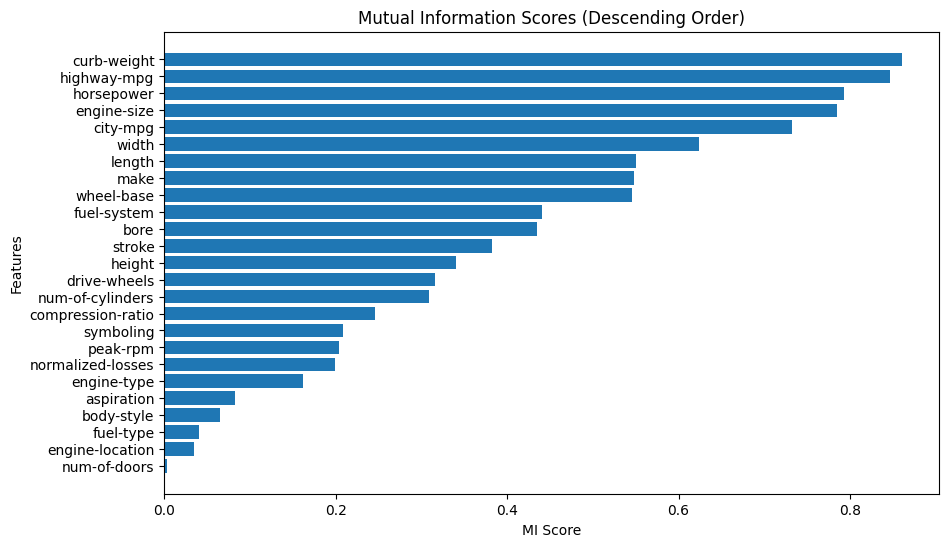

In [ ]:
# Sort the MI scores in descending order
sorted_mi_scores = mi_scores.sort_values()

# Plot the sorted MI scores
plt.figure(figsize=(10, 6))
plt.barh(sorted_mi_scores.index, sorted_mi_scores.values)
plt.title("Mutual Information Scores (Descending Order)")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()

<Axes: xlabel='curb-weight', ylabel='price'>

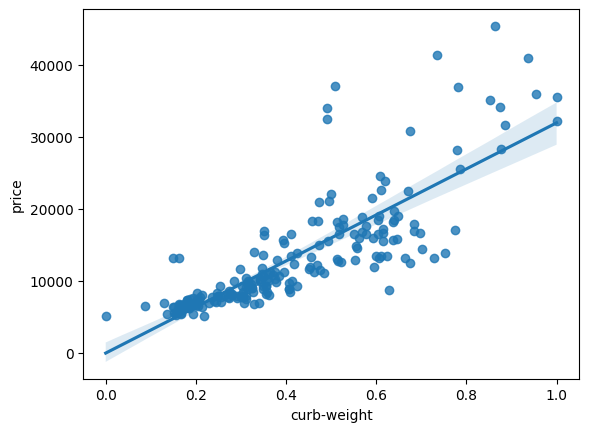

In [ ]:
sns.regplot(data = df_copy , x='curb-weight',y='price')

In [ ]:
mi_scores.index[:10]

Index(['curb-weight', 'highway-mpg', 'horsepower', 'engine-size', 'city-mpg',
       'width', 'length', 'make', 'wheel-base', 'fuel-system'],
      dtype='object')

In [ ]:
X_new = X[mi_scores.index[:10]]
X_new

,curb-weight,highway-mpg,horsepower,engine-size,city-mpg,width,length,make,wheel-base,fuel-system
0,0.411171,0.289474,0.262500,0.260377,0.222222,0.316667,0.413433,0,0.058309,0
1,0.411171,0.289474,0.262500,0.260377,0.222222,0.316667,0.413433,0,0.058309,0
2,0.517843,0.263158,0.441667,0.343396,0.166667,0.433333,0.449254,0,0.230321,0
3,0.329325,0.368421,0.225000,0.181132,0.305556,0.491667,0.529851,1,0.384840,0
4,0.518231,0.157895,0.279167,0.283019,0.138889,0.508333,0.529851,1,0.373178,0
...,...,...,...,...,...,...,...,...,...,...
200,0.567882,0.315789,0.275000,0.301887,0.277778,0.716667,0.711940,21,0.655977,0
201,0.605508,0.236842,0.466667,0.301887,0.166667,0.708333,0.711940,21,0.655977,0
202,0.591156,0.184211,0.358333,0.422642,0.138889,0.716667,0.711940,21,0.655977,0
203,0.670675,0.289474,0.241667,0.316981,0.361111,0.716667,0.711940,21,0.655977,6


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_new, y , test_size=0.15,random_state=0)

X_train.shape , X_test.shape , y_train.shape, y_test.shape

((174, 10), (31, 10), (174,), (31,))

In [ ]:

# Linear Regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

# Random Forest model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0)

# Extreme Gradient Boosting model
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state = 0)
models = [{'Linear Regression': linear_reg} , {'Random Forest':random_forest},
         {'XGBoost':xgbr}]

In [ ]:
from sklearn.metrics import mean_absolute_error

for i in models:
    for key, value in i.items():
        value.fit(X_train , y_train)
        y_pred = value.predict(X_test)

        mae = mean_absolute_error(y_test , y_pred)
        print(f'Model {key} MAE: {mae}')
        print('-'*40)


Model Linear Regression MAE: 3139.6674493167793
----------------------------------------
Model Random Forest MAE: 2205.6213433638263
----------------------------------------
Model XGBoost MAE: 2076.696730090726
----------------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
for i in models:
  for key,value in i.items():
    scores = -1 * cross_val_score(value, X, y,cv=5,scoring='neg_mean_absolute_error')

    print(f"MAE scores for {key} :\n", scores.mean())
    print('-'*50)


MAE scores for Linear Regression :
 3507.4054384960627
--------------------------------------------------
MAE scores for Random Forest :
 2652.6206760708656
--------------------------------------------------
MAE scores for XGBoost :
 2979.4616639672254
--------------------------------------------------
